In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./parallel_benchmark.csv', sep=',')
df['BEST_RUN'] = df[['RUN1', 'RUN2', 'RUN3', 'RUN4', 'RUN5', 'RUN6']].min(axis=1)
df['MEAN'] = df[['RUN1', 'RUN2', 'RUN3', 'RUN4', 'RUN5', 'RUN6']].mean(axis=1)
df['MEAN'] = df['MEAN'].round(2)
df['EFF_BEST'] = df[df['CORES'] == 1]['BEST_RUN'].values[0]*100/(df['CORES']*df['BEST_RUN'])
df['EFF_BEST'] = df['EFF_BEST'].round(2)
df['EFF_MEAN'] = df[df['CORES'] == 1]['MEAN'].values[0]*100/(df['CORES']*df['MEAN'])
df['EFF_MEAN'] = df['EFF_MEAN'].round(2)

df.to_csv('./parallel_benchmark_output.csv', sep=',')
df

,CORES,RUN1,RUN2,RUN3,RUN4,RUN5,RUN6,BEST_RUN,MEAN,EFF_BEST,EFF_MEAN
0,1,241.40,250.90,242.50,269.38,259.08,268.78,241.40,255.34,100.00,100.00
1,2,137.82,145.05,137.07,162.44,149.22,165.89,137.07,149.58,88.06,85.35
2,4,86.65,87.78,84.65,95.36,121.99,110.50,84.65,97.82,71.29,65.26
3,8,59.15,57.46,57.94,65.98,65.11,82.52,57.46,64.69,52.51,49.34
4,16,49.91,62.44,48.75,93.18,52.55,44.43,44.43,58.54,33.96,27.26
5,24,56.87,56.30,48.44,41.06,41.23,66.40,41.06,51.72,24.50,20.57
6,32,53.43,48.87,38.92,42.15,58.72,68.67,38.92,51.79,19.38,15.41


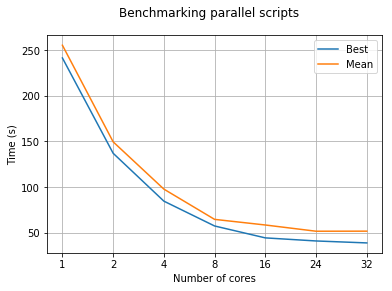

In [9]:
plt.xticks(df.index.values, df.CORES.values)
best = plt.plot(df.index, df['BEST_RUN'])
mean = plt.plot(df.index.values, df['MEAN'].values)
plt.grid()
plt.ylabel("Time (s)")
plt.xlabel("Number of cores")
plt.suptitle("Benchmarking parallel scripts")
plt.legend((best[0], mean[0]), ('Best', 'Mean'))
plt.savefig('./parallel_efficiency_plot.png', bbox='tight')
plt.show()
